In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle as pkl


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Load and split dataset

In [2]:
df = pd.read_csv("../data/heart_disease.csv")
X = df.drop("num", axis=1)
y = df["num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
df

,PC1,PC2,PC4,PC5,PC6,PC7,PC11,num
0,0.675205,0.344930,-0.087400,-0.438102,1.117363,-0.144715,-0.052244,0.0
1,3.544619,0.506039,-0.653609,0.713136,-1.170823,0.391445,0.053414,2.0
2,2.386927,-1.237065,-0.018786,0.465064,0.576870,-0.705147,0.092074,1.0
3,-1.344182,-0.262477,2.743671,0.313740,1.221851,0.702343,-0.377414,0.0
4,-1.755805,-0.296602,0.764861,0.245258,0.185786,0.279775,0.480802,0.0
...,...,...,...,...,...,...,...,...
298,-0.622619,-1.052430,0.766006,-1.006978,-0.233717,0.353068,0.633262,1.0
299,2.566185,-0.885424,-0.090710,1.081507,0.992006,-0.348138,0.261857,2.0
300,0.905604,-2.366826,-1.188388,-0.033922,-0.595107,-0.390816,0.015781,3.0
301,-0.777244,0.692779,-0.656726,0.792481,0.273470,-0.046283,0.921933,1.0


# Logistic Regression

In [3]:
# Create and train the model
log_reg_model = LogisticRegression(random_state=30)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
performance_metrics = f"Logistic Regression\n"
performance_metrics += f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}\n"
performance_metrics += f"\nClassification Report:\n{classification_report(y_test, y_pred_log_reg, zero_division=0)}"
print(performance_metrics)

Logistic Regression
Accuracy: 0.6885

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        39
         1.0       0.25      0.33      0.29         6
         2.0       0.14      0.12      0.13         8
         3.0       0.25      0.50      0.33         4
         4.0       0.00      0.00      0.00         4

    accuracy                           0.69        61
   macro avg       0.32      0.38      0.34        61
weighted avg       0.68      0.69      0.68        61



In [ ]:
# Save metrics
with open("../results/evaluation_metrics.txt", "a") as file:
    file.write(performance_metrics + "\n\n\n")

In [4]:
# Save the model
with open("../models/logistic_regression_model.pkl", "wb") as file:
    pkl.dump(log_reg_model, file)

# Decision Tree

In [5]:
# create and train the model
dt_model = DecisionTreeClassifier(random_state=30, max_depth=3)
dt_model.fit(X_train, y_train)

# make predictions
y_pred_dt = dt_model.predict(X_test)

# evaluate the model
performance_metrics = f"Decision Tree\n"
performance_metrics += f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}\n"
performance_metrics += f"\nClassification Report:\n{classification_report(y_test, y_pred_dt, zero_division=0)}"
print(performance_metrics)

Decision Tree
Accuracy: 0.6557

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.87      0.91        39
         1.0       0.40      0.33      0.36         6
         2.0       0.00      0.00      0.00         8
         3.0       0.20      1.00      0.33         4
         4.0       0.00      0.00      0.00         4

    accuracy                           0.66        61
   macro avg       0.31      0.44      0.32        61
weighted avg       0.66      0.66      0.64        61



In [ ]:
# Save metrics
with open("../results/evaluation_metrics.txt", "a") as file:
    file.write(performance_metrics + "\n\n\n")

In [6]:
# Save the model
with open("../models/decision_tree_model.pkl", "wb") as file:
    pkl.dump(dt_model, file)

# Random Forest

In [7]:
# create and train the model
rf_model = RandomForestClassifier(n_estimators=50, random_state=30)
rf_model.fit(X_train, y_train)

# make predictions
y_pred_rf = rf_model.predict(X_test)

# evaluate the model
performance_metrics = f"Random Forest\n"
performance_metrics += f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n"
performance_metrics += f"\nClassification Report:\n{classification_report(y_test, y_pred_rf, zero_division=0)}"
print(performance_metrics)

Random Forest
Accuracy: 0.7213

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        39
         1.0       0.38      0.50      0.43         6
         2.0       0.14      0.12      0.13         8
         3.0       0.29      0.50      0.36         4
         4.0       0.00      0.00      0.00         4

    accuracy                           0.72        61
   macro avg       0.36      0.42      0.38        61
weighted avg       0.70      0.72      0.71        61



In [ ]:
# save metrics
with open("../results/evaluation_metrics.txt", "a") as file:
    file.write(performance_metrics + "\n\n\n")

In [8]:
# Save the model
with open("../models/random_forest_model.pkl", "wb") as file:
    pkl.dump(rf_model, file)

# Support Vector Machine

In [9]:
# create and train the model
svm_model = SVC(kernel='rbf', random_state=30, probability=True)
svm_model.fit(X_train, y_train)


# make predictions
y_pred_svm = svm_model.predict(X_test)

# evaluate the model
performance_metrics = f"Support Vector Machine\n"
performance_metrics += f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}\n"
performance_metrics += f"\nClassification Report:\n{classification_report(y_test, y_pred_svm, zero_division=0)}"
print(performance_metrics)

Support Vector Machine
Accuracy: 0.6557

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        39
         1.0       0.17      0.17      0.17         6
         2.0       0.14      0.12      0.13         8
         3.0       0.14      0.25      0.18         4
         4.0       0.00      0.00      0.00         4

    accuracy                           0.66        61
   macro avg       0.27      0.30      0.28        61
weighted avg       0.62      0.66      0.64        61



In [ ]:
# save metrics
with open("../results/evaluation_metrics.txt", "a") as file:
    file.write(performance_metrics + "\n\n\n")

In [10]:
# Save the model
with open("../models/svm_model.pkl", "wb") as file:
    pkl.dump(svm_model, file)

# ROC Curve and AUC Score

In [11]:
def plot_roc_curve(X_test, y_test, model, model_name="Model", ax:plt.Axes = None):
    y_prob = model.predict_proba(X_test)

    plt.figure(figsize=(8, 6))
    for i in range(model.classes_.shape[0]):
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=model.classes_[i])
        roc_auc = auc(fpr, tpr)

        if ax is None:
            plt.plot(fpr, tpr, lw=1.5, label=f'Class {model.classes_[i]} (AUC = {roc_auc:.2f})')
        else:
            ax.plot(fpr, tpr, lw=1.5, label=f'Class {model.classes_[i]} (AUC = {roc_auc:.2f})')

    if ax is None:
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name} (One-vs-Rest)')
        plt.legend(title='Heart Disease Level', loc='lower right')
        plt.grid(True)
        plt.show()

    else:
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve - {model_name} (One-vs-Rest)')
        ax.legend(title='Heart Disease Level', loc='lower right')
        ax.grid(True)

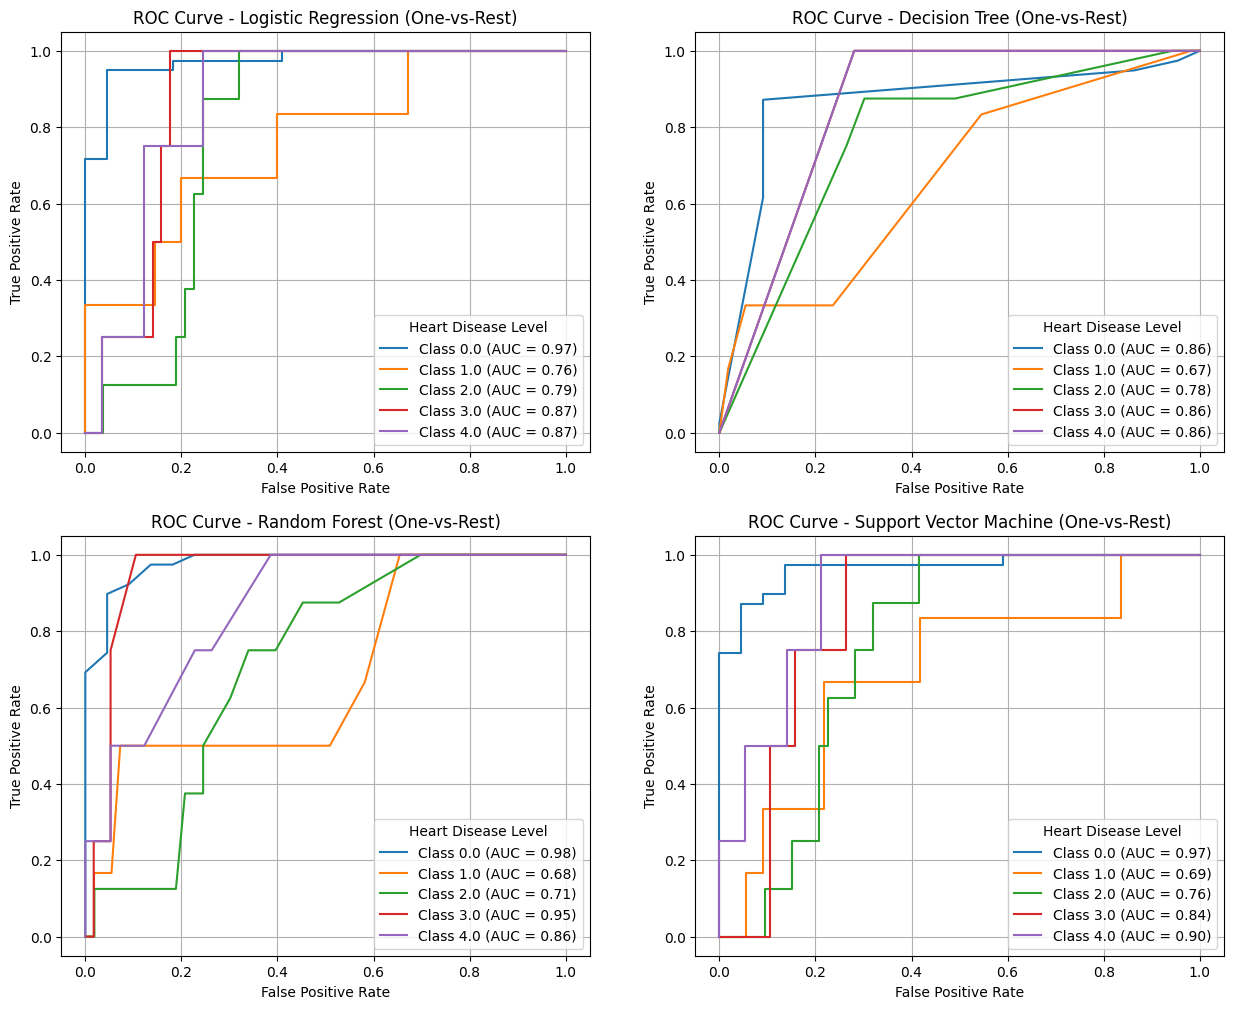

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [12]:
models = {
    "Logistic Regression": log_reg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Support Vector Machine": svm_model
}

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
for ax, (model_name, model) in zip(axs.ravel(), models.items()):
    plot_roc_curve(X_test, y_test, model=model, model_name=model_name, ax=ax)

plt.show()